In [ ]:
import random
import numpy as np

import matplotlib.pyplot as plt

import warnings 

from sklearn.datasets import make_swiss_roll, make_blobs, load_digits
from sklearn import decomposition
from sklearn.manifold import TSNE

In [ ]:
%matplotlib inline
# %config InlineBackend.figure_formats = ["svg"]
%config InlineBackend.figure_formats = ["retina"]

# Q1: Fill-in the PCA function  
In this question, you should implement PCA using the numpy library only. 

In [ ]:
def pca(X, num_components): 
    '''Input: 
        X: data
        num_components: number of components after PCA reduction. 
        The function returns the projected X with n_components dimensions '''
    
    # computing the vector of column means, and substracting it to X
    col_means  = np.mean(X, axis=0)
    X_centered = X - col_means

    # computing the covariance matrix
    C = np.cov(X_centered, rowvar = False)

    # eigendecomposition
    eig_values, eig_vectors = np.linalg.eigh(C)

    # sort eigenvalues and vectors
    ind_sorted  = np.argsort(eig_values)[::-1]
    eig_values  = eig_values[ind_sorted]
    eig_vectors = eig_vectors[:, ind_sorted]
    eig_vectors = eig_vectors[:, :num_components]

    # PCA projection
    X_reduced = np.dot(X_centered, eig_vectors)
     
    return X_reduced

To test your implementation, compare your implementation `pca` with the pca function from the sklearn library. 

In [ ]:
# Generate dummy dataset 100 times.
error_max = 0
error_mean = 0
for _ in range(100): 
    lower_bound = np.random.randint(10, 50) 
    upper_bound = np.random.randint(100, 1000)
    num_components = np.random.randint(1, 9)
    X = np.random.randint(lower_bound, upper_bound, 1000).reshape(100,10) 
    X_pca_sklearn = decomposition.PCA(n_components=num_components).fit_transform(X) 
    X_pca = pca(X, num_components)
    # The PCA solution is unique up to the sign of the eigenvectors.
    # We use X^T * X to calculate the error.
    error = np.linalg.norm( np.dot(X_pca_sklearn.transpose(), X_pca_sklearn) 
                   - np.dot(X_pca.transpose(), X_pca)
                   ,'fro')
    assert error < 1e-7
    error_max = max(error_max, error)
    error_mean += error

print(f"Average error: {error_mean/100:12.4}")
print(f"Largest error: {error_max:12.4}")

Average error:      1.1e-08
Largest error:    6.347e-08


# TSNE from Sklearn library

The following helper functions demonstrate how to use TSNE from the scikit-learn library.

In [ ]:
n_samples = 500

def produce_plots_3D(data_generator):
    X, X_color, title = data_generator(n_samples)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[:,0], X[:,1], X[:,2], c=X_color)
    plt.title(title)
    plt.show()
    return X, X_color, title

def plot_data(X, X_color, title):
    plt.scatter(X[:,0], X[:,1], c=X_color)
    plt.title(title)    
    plt.show()

def pca_plots_2d(X, X_color, title): 
    # Fit and plot PCA
    plot_data(pca(X, 2), X_color, title + " - PCA")
    
def tsne_plots_2d(X, X_color, title): 
    # Fit and plot TSNE 
    with warnings.catch_warnings(): 
        warnings.simplefilter("ignore",category=FutureWarning)
        X_tsne = TSNE(n_components=2).fit_transform(X)        
    plot_data(X_tsne, X_color, title + " - tSNE")

# Q2: PCA vs TSNE projection on the Digits Dataset 
Using your PCA implementation from Q1 and the helper functions given above, run the following cells to compute and plot the 2-dimensional embedding generated by PCA and TSNE for the Digits dataset. Describe your observations. Explain the pros and cons of each algorithm. (You can just make a new cell at the end of the question to write down your observation and just turn in the notebook/Colab) 

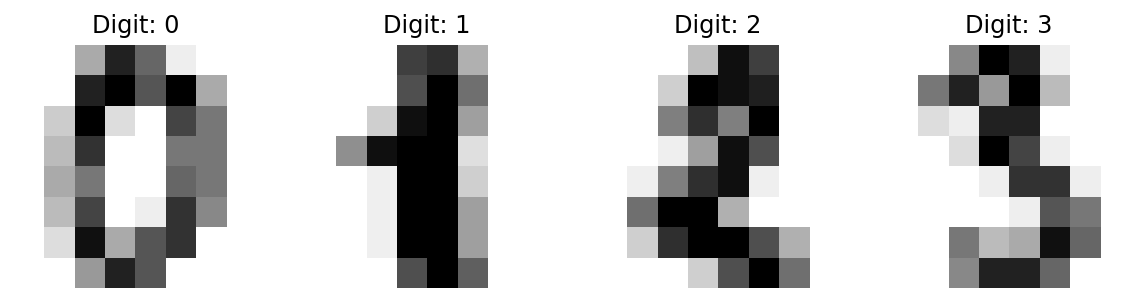

In [ ]:
digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Digit: %i" % label)

In [ ]:
def generate_digits(n_samples):
    X, y = load_digits(n_class = 10, return_X_y = True)
    return X, y, "Digits" 

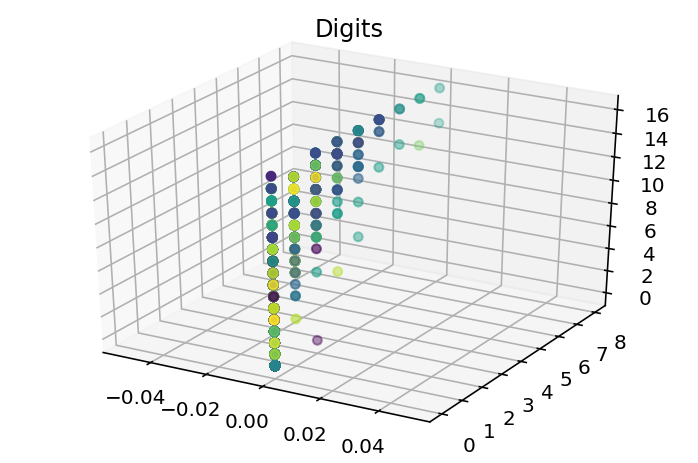

In [ ]:
X, X_color, title = produce_plots_3D(generate_digits)

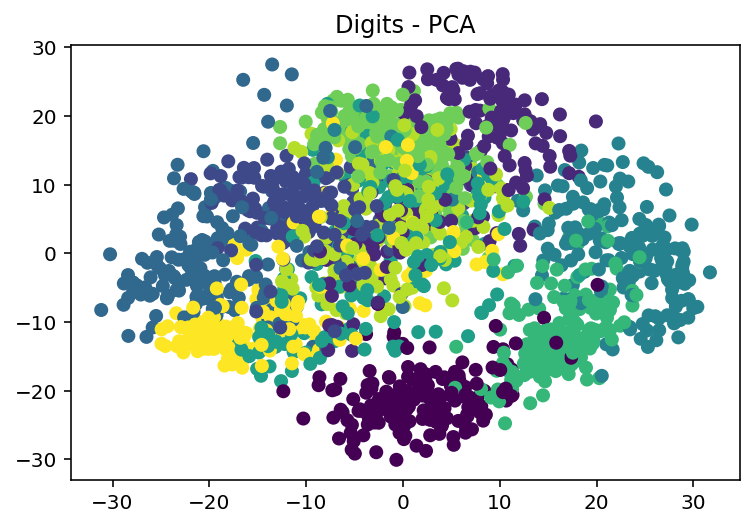

In [ ]:
pca_plots_2d(X, X_color, title)

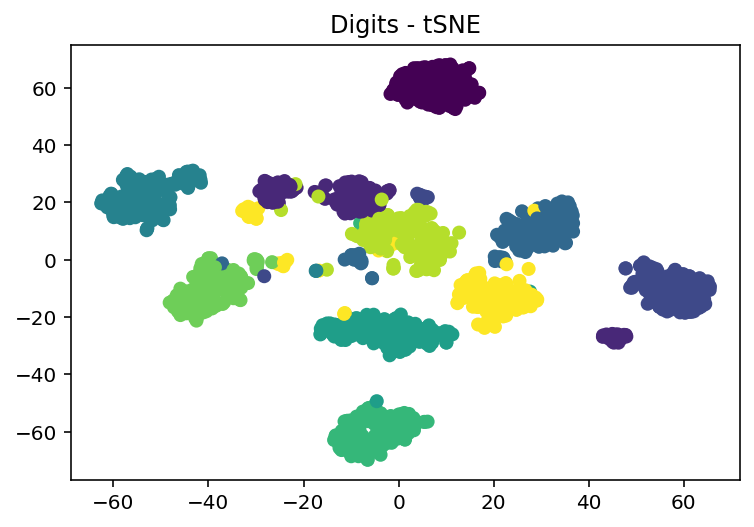

In [ ]:
tsne_plots_2d(X, X_color, title)

For PCA, the dimensionality reduction has led to clusters that largely overlap, making the distinction between clusters difficult and the data hard to use. However we can visualize the spread for each cluster.

For tSNE, although there are a few overlaps, the algorithm has mostly succeeded in isolating the various clusters after dimensionality reduction.

In this case, tSNE seems to yield better results. However, there is still an advantage to using PCA depending on the use case, since tSNE is computationally expensive and does not return a good representation of the topology.

# Q3: Investigating the Role of the Perplexity in TSNE for the Long Clusters Dataset.
Implement the function `tsne_plots_perplexity` to iterate through the different values of perplexity. Observe and comment on the effect of the perplexity on the 2D TSNE visualization of the long clusters dataset. The long clusters dataset is composed of two clusters in 2D arranged in parallel line with some guassian noise. 

In [ ]:
def generate_longclusters(): 

    x1 = np.asarray([i for i in range(-50, 50, 1)])
    x2 = np.asarray([i for i in range(-40, 60, 1)])
    y1 = x1 + np.random.normal(0, 3, 100)
    y2 = x2 + np.random.normal(-20, 3, 100)

    x1, x2 = np.expand_dims(x1, axis=1), np.expand_dims(x2, axis=1) 
    y1, y2 = np.expand_dims(y1, axis=1), np.expand_dims(y2, axis=1) 
    xy1, xy2 = np.concatenate((x1,y1), axis=1), np.concatenate((x2,y2), axis=1)
    xy = np.concatenate((xy1, xy2), axis=0)

    x1_color = [1] * 100 
    x2_color = [2] * 100 
    X_color = x1_color + x2_color
    
    plt.scatter(xy[:,0], xy[:,1], c=X_color)
    plt.title('long clusters')    
    plt.show()

    return xy, X_color, 'long clusters'

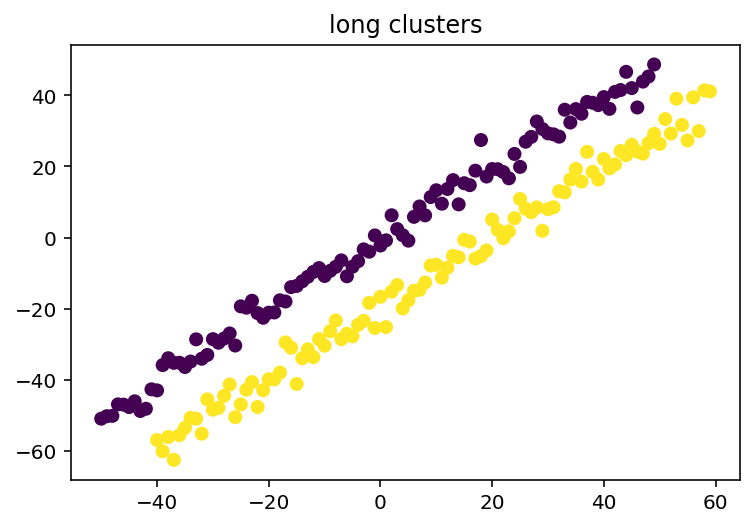

In [ ]:
X, X_color, title = generate_longclusters()

In [ ]:
def tsne_plots_perplexity(X, X_color, title): 

    # typical values are between 5 and 50
    for perplexity in range (5, 51, 5):
      # Fit and plot TSNE 
      with warnings.catch_warnings(): 
          warnings.simplefilter("ignore",category=FutureWarning)
          X_tsne = TSNE(n_components=2, perplexity=perplexity).fit_transform(X)        
      plot_data(X_tsne, X_color, title + " - tSNE" + " - perplexity: " + str(perplexity))

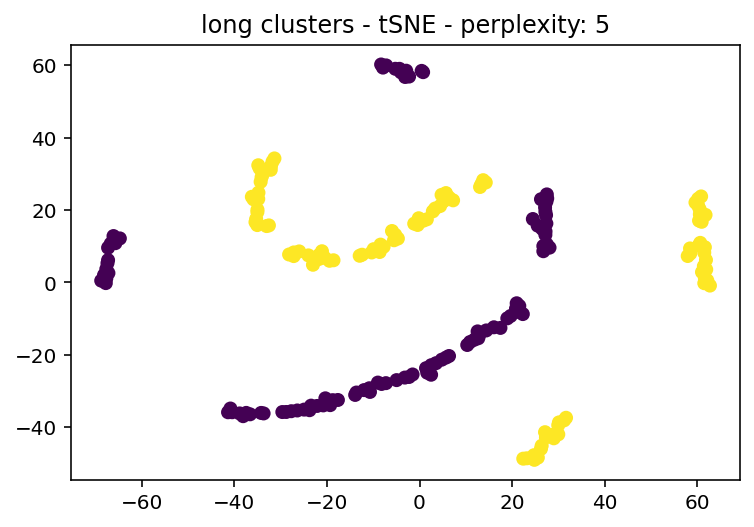

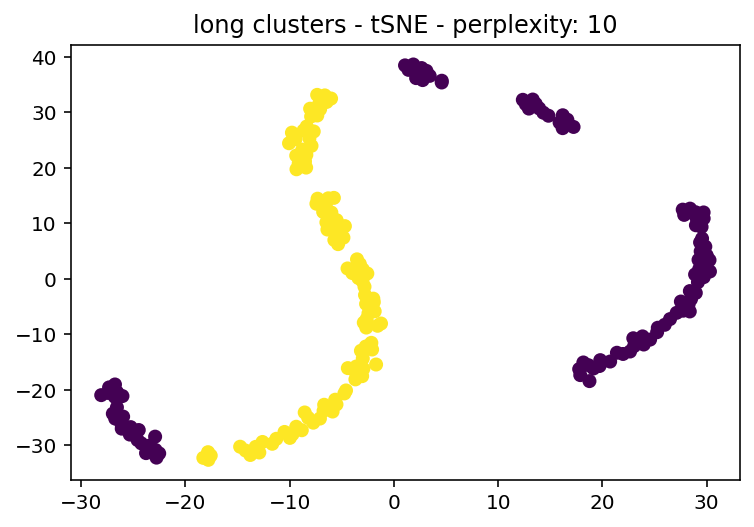

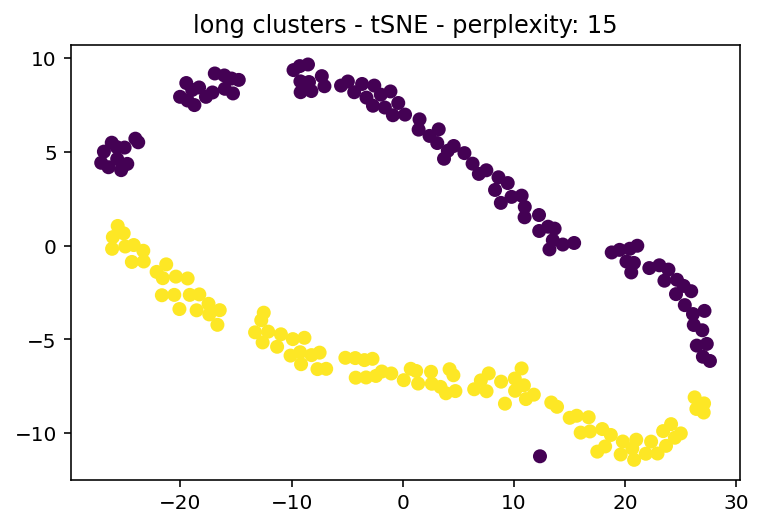

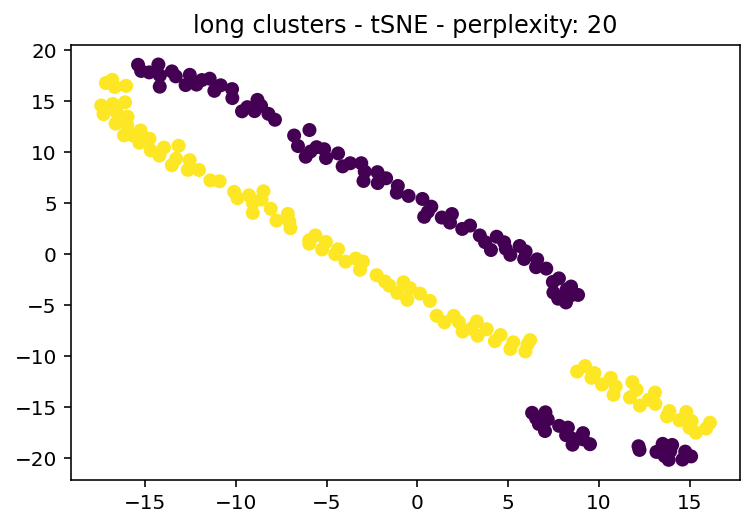

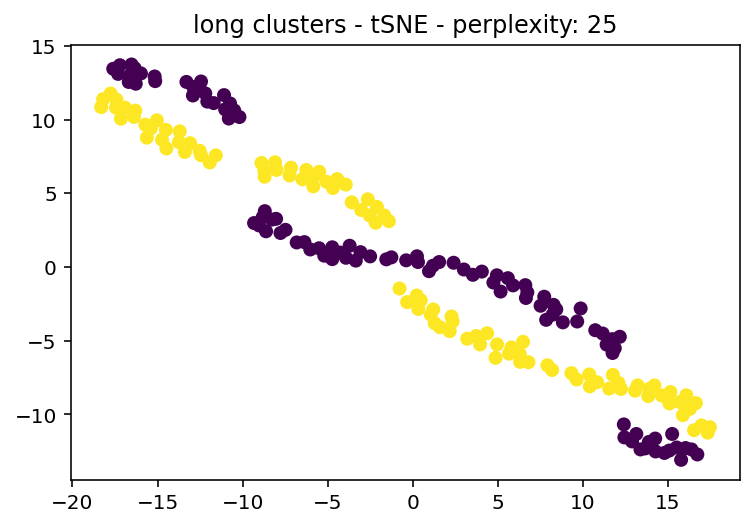

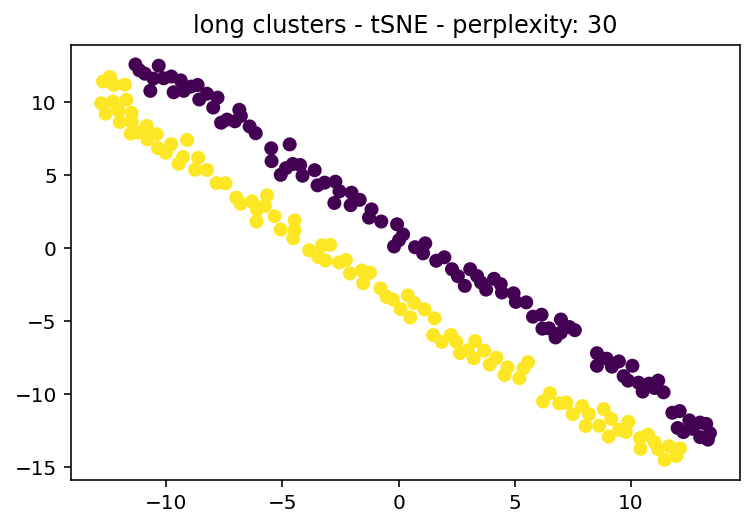

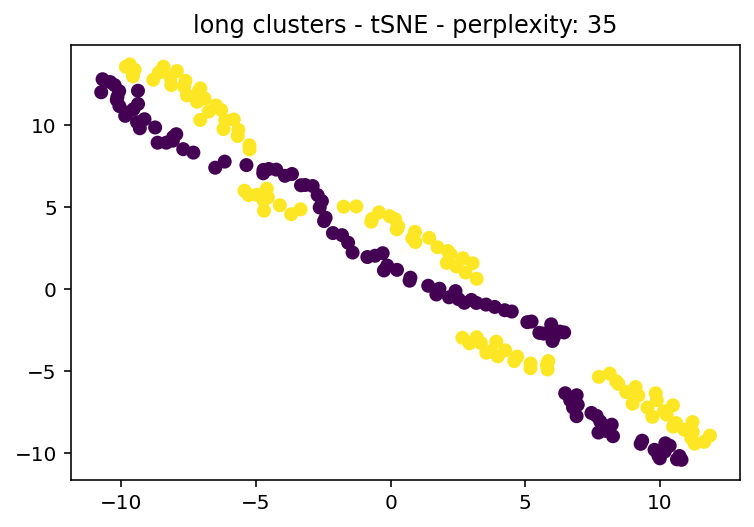

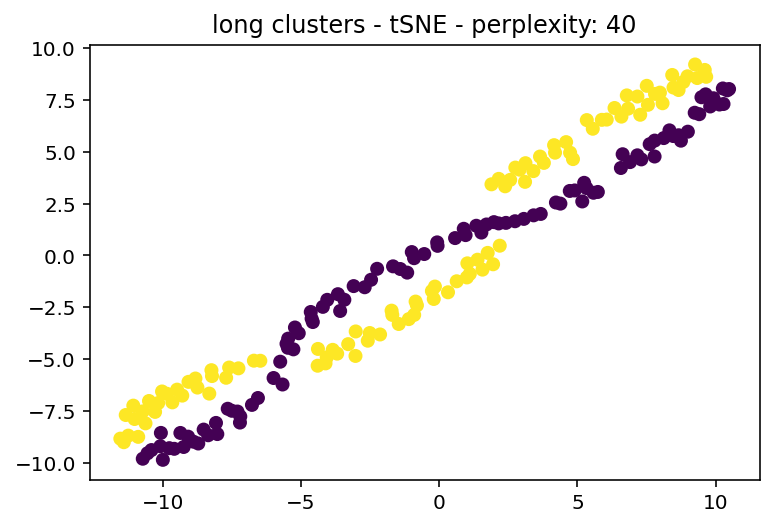

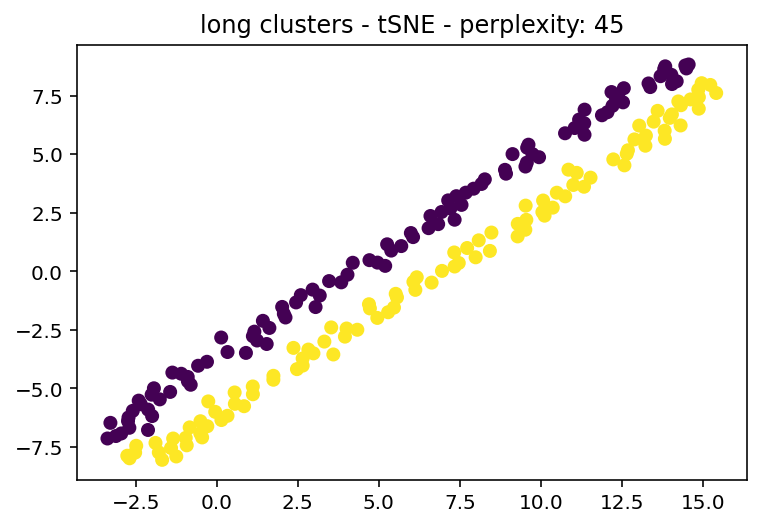

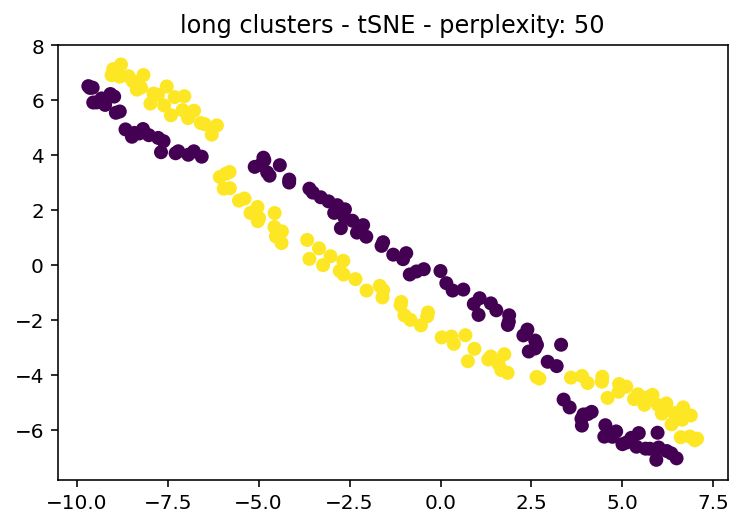

In [ ]:
# run this cell to test your implementation! 
tsne_plots_perplexity(X, X_color, title)

Changing the perplexity is similar to choosing whether we want many neighbours (large perplexity) or not (small perplexity).

Here, we can see that with a small perplexity (5), we obtain a lot of clusters since a cluster is defined with fewer points.

As the perplexity is increased, we can see that clusters are allowed to contain more points, meaning the algorithm will look further for neighbours. This translates into the smaller clusters regrouping. A perplexity of 15 offers a satisfactory clustering of the initial structures. 

When the perplexity is too high, large scale structures are being mixed together. We do find the initial structures, but it is interesting to note that running the program several times shows that this is not always the case.

# Q4: PCA vs TSNE Reduction on Swiss_Roll Dataset 
Run the following cells. Compute and plot the 2-dimensional embedding generated by PCA and TSNE on the `Swiss_Roll` dataset. Describe your observations. Describe the pros and cons of each method.

In [ ]:
def generate_swiss_roll_data(n_samples):
    noise = 0.05
    X, _ = make_swiss_roll(n_samples=n_samples, noise=noise)
    X[:, 1] *= .5
    distance_from_y_axis = X[:, 0] ** 2 + X[:, 2] ** 2 
    return X, distance_from_y_axis, "Swiss roll"

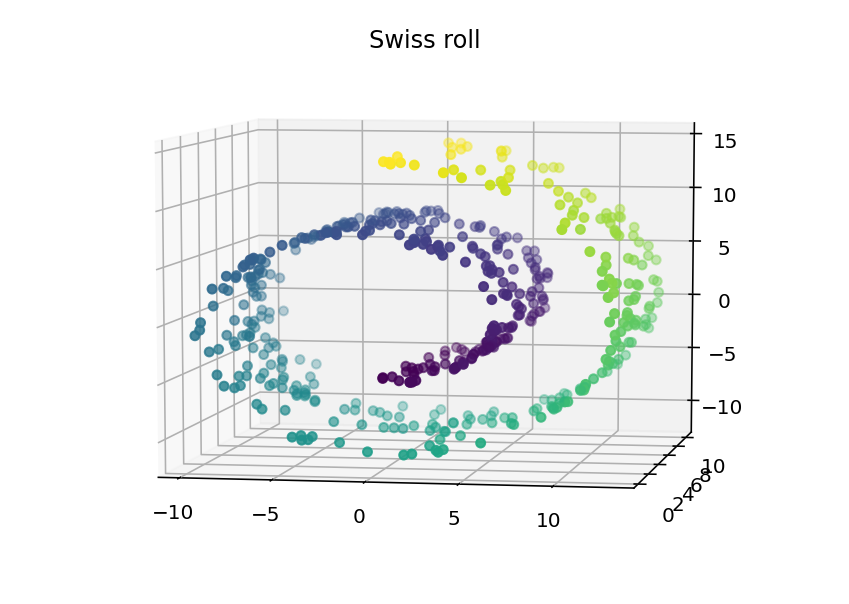

In [ ]:
X, X_color, title = generate_swiss_roll_data(n_samples)

fig = plt.figure()
ax = fig.add_subplot(projection='3d', elev=7, azim=-80)
ax.set_position([0, 0, 0.95, 1])
ax.scatter(X[:,0], X[:,1], X[:,2], c=X_color)
plt.title(title)
plt.show()

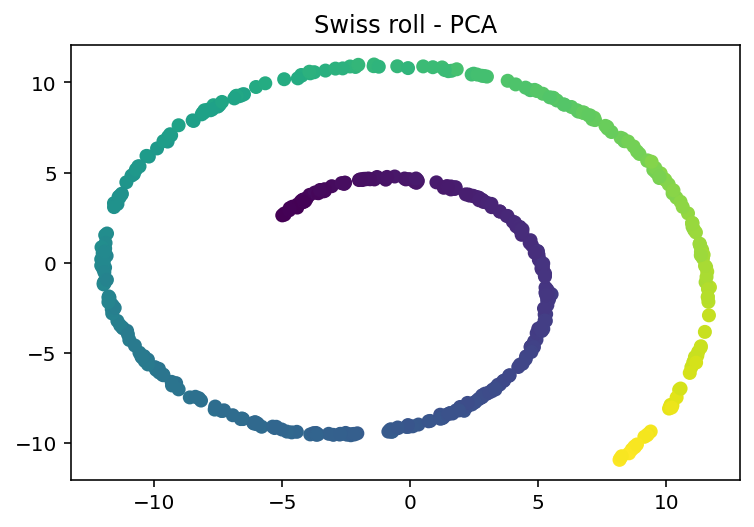

In [ ]:
pca_plots_2d(X, X_color, title)

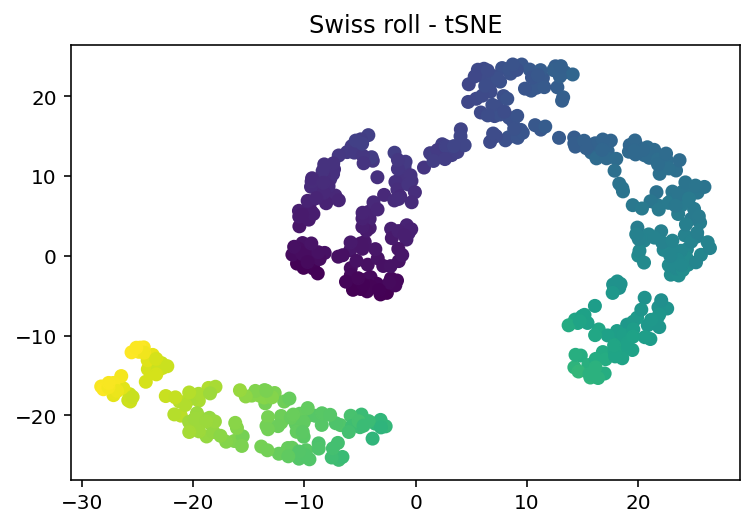

In [ ]:
tsne_plots_2d(X, X_color, title)

For PCA: the (X,Y) profile is conserved (ie. we still see a roll), but we are losing all the information regarding the Z axis. Points that have very close X and Y coordinates but very different Z coordinates will be considered almost the same.

For tSNE: There is almost no information loss, in the sense that the distance between points is almost always preserved (at a different scale). However, the initial topology of a roll is not preserved.



# Q5: TSNE perplexity for the Swiss Roll dataset

Run the following cell and describe the effect of perplexity on the Swiss Roll dataset for TSNE visualization. How would you choose the perplexity and why?

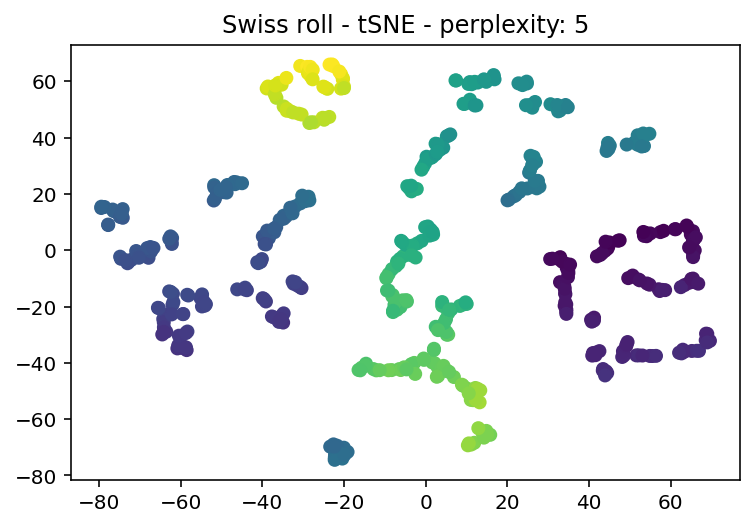

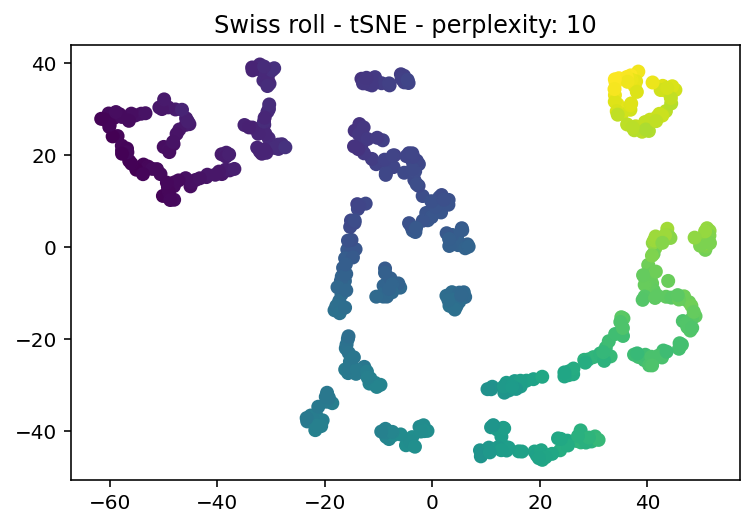

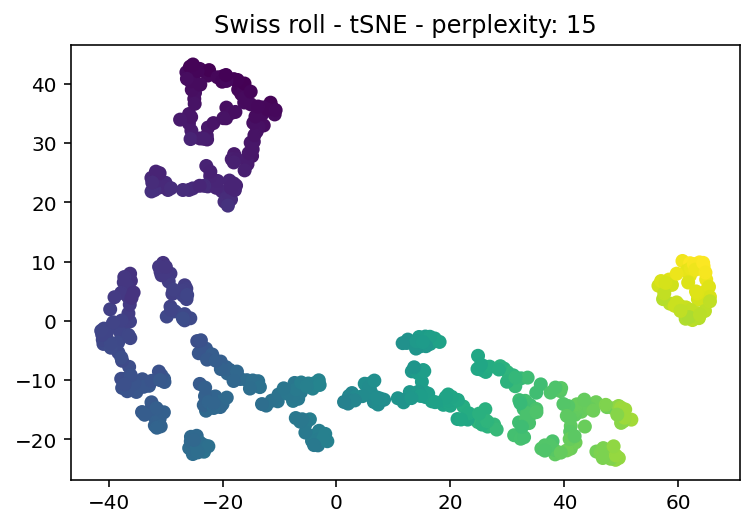

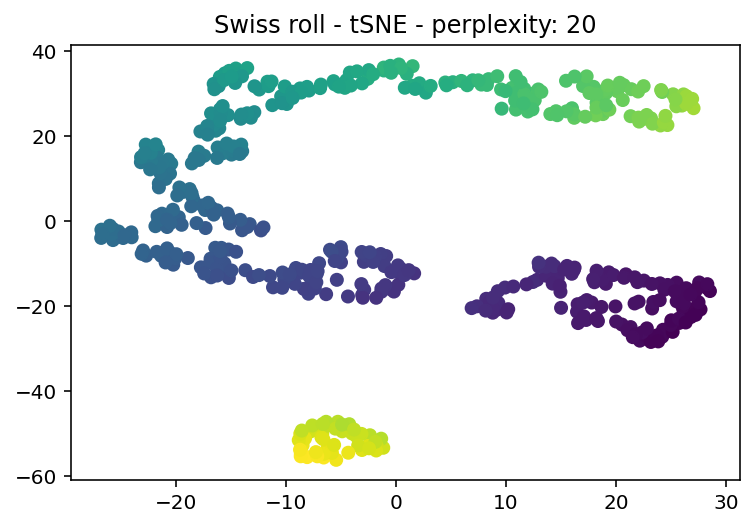

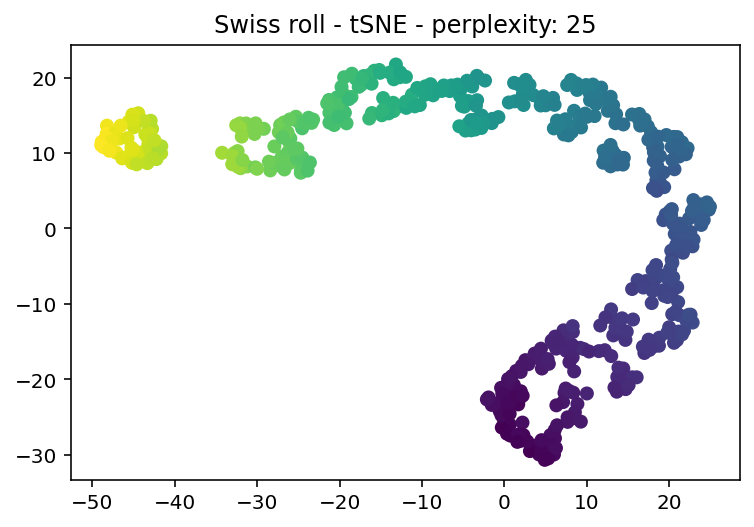

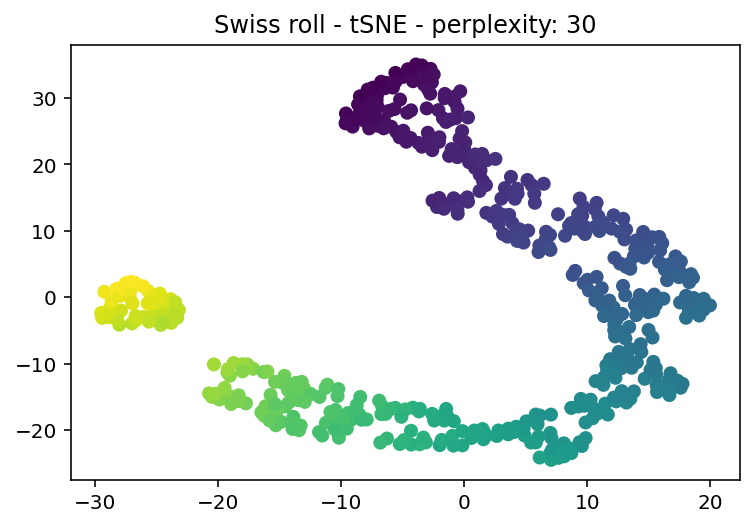

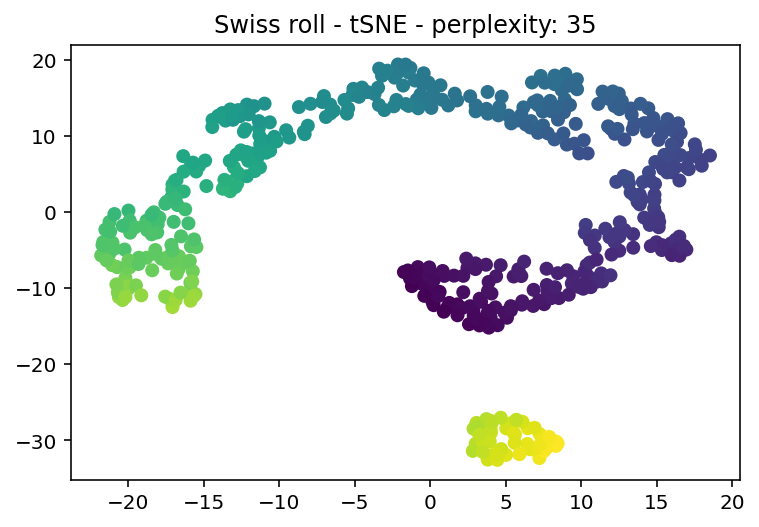

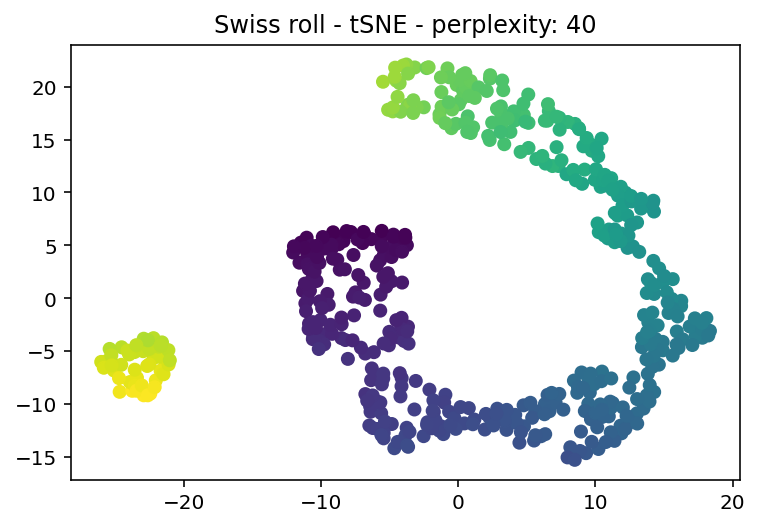

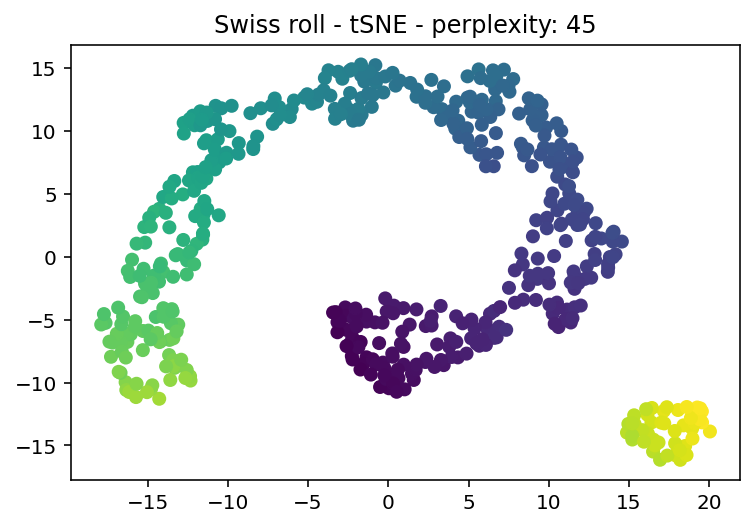

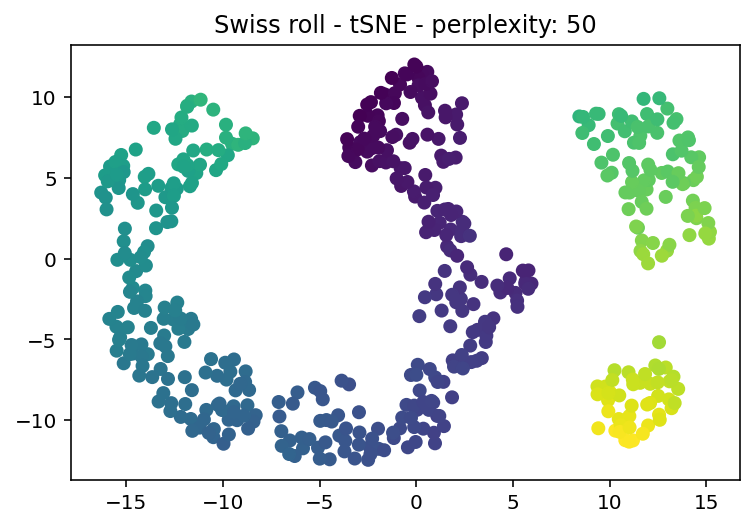

In [ ]:
X, X_color, title = generate_swiss_roll_data(n_samples)
tsne_plots_perplexity(X, X_color, title)

We can see that with a perplexity of 10 or less, tSNE struggles to identify the clusters as only points that are very close matter. We therefore see spurious structures appear.

Unlike previously, we do not see a real degradation of the clustering as the perplexity goes up. However, a perplexity of 15 or 25 would offer a representation that is more true to the initial swiss roll, preserving the 'continuity' of the data.

# Q6: PCA vs TSNE Reduction on Gaussian Blob Dataset 

You are given the following code to generate 6 Gaussian Blobs. Please run the following code to compute and plot the 2D projection generated by PCA and TSNE. Describe your observations. 

In [ ]:
def generate_gaussian_blobs(n_samples):
    X, y = make_blobs(n_samples=n_samples, centers=6, n_features=3, random_state=3)
    return X, y, "Gaussian blobs" 

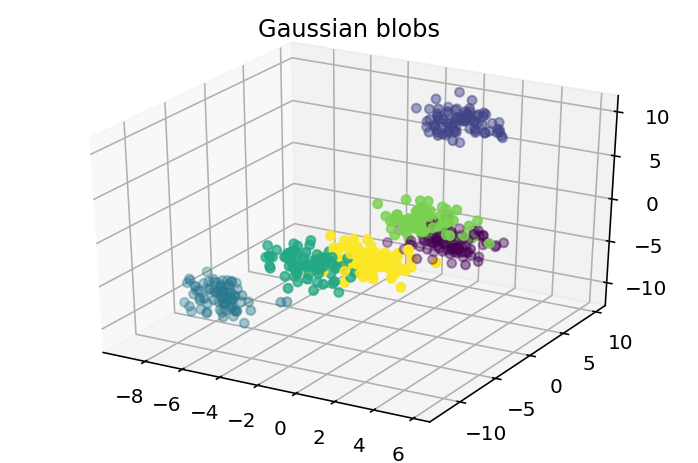

In [ ]:
X, X_color, title = produce_plots_3D(generate_gaussian_blobs)

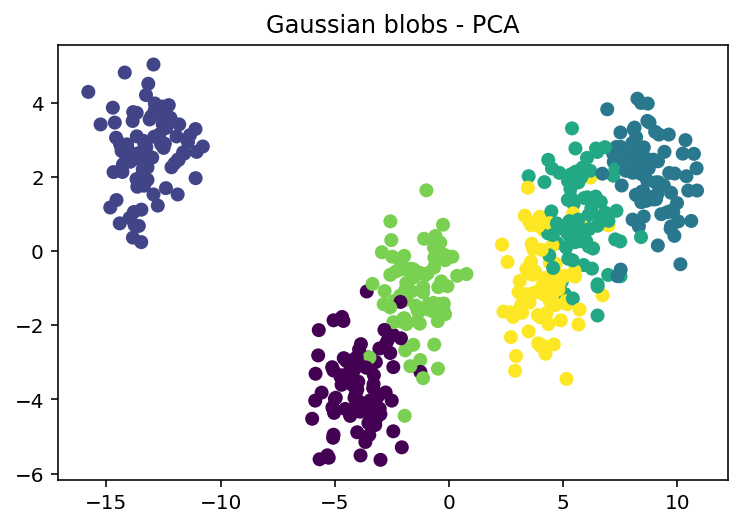

In [ ]:
pca_plots_2d(X, X_color, title)

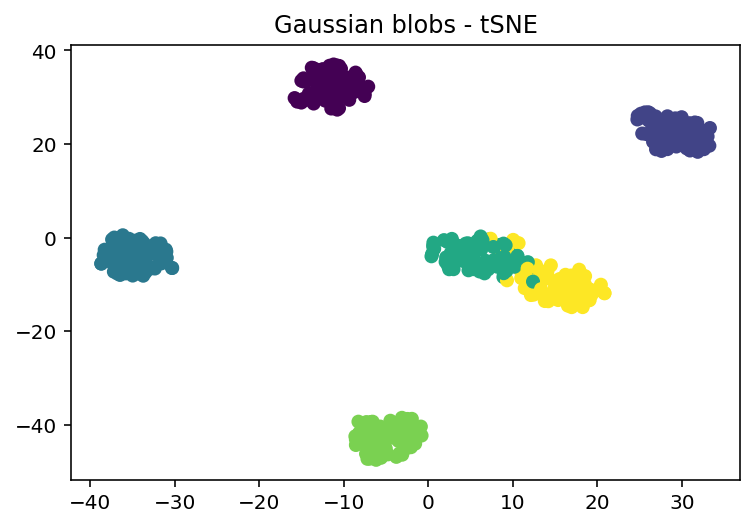

In [ ]:
tsne_plots_2d(X, X_color, title)

Once again, PCA offers a less effective clustering as clusters overlap with each other. 

tSNE offers clusters that don't overlap except for two of them (which are still distinguishable from one another).

It is interesting to note that since the blobs have roughly the same geometry, the argument that tSNE does not display an accurate topology is not true here. This makes tSNE an even better candidate in this situation.

# Q7: PCA vs TSNE Reduction on Gaussian Blob with different sizes

Based on the function `generate_gaussian_blobs` above, please implement the following function `generate_gaussian_blobs_diff_size`, so that two different Gaussian blobs are generated. The standard deviation (or the radius) of the first Gaussian blob should be three times that of the second Gaussian blob. Plot and comment on your results.

In [ ]:
def generate_gaussian_blobs_diff_size(n_samples):
    X, y = make_blobs(n_samples=n_samples, centers=2, cluster_std=[3.0, 1.0], n_features=3, random_state=3)
    return X, y, "Gaussian blobs" 

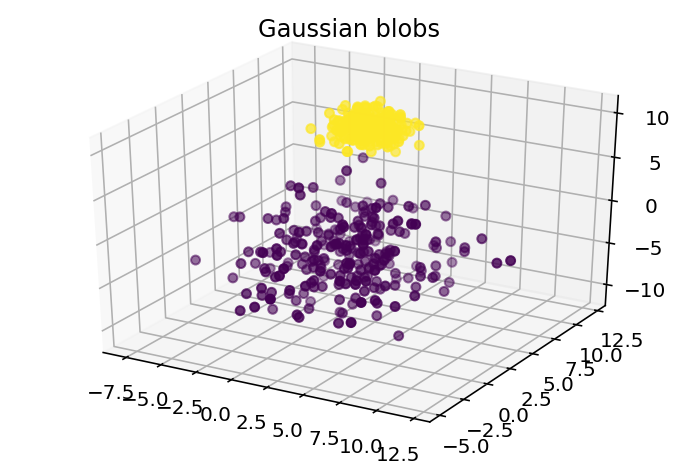

In [ ]:
X, X_color, title = produce_plots_3D(generate_gaussian_blobs_diff_size)

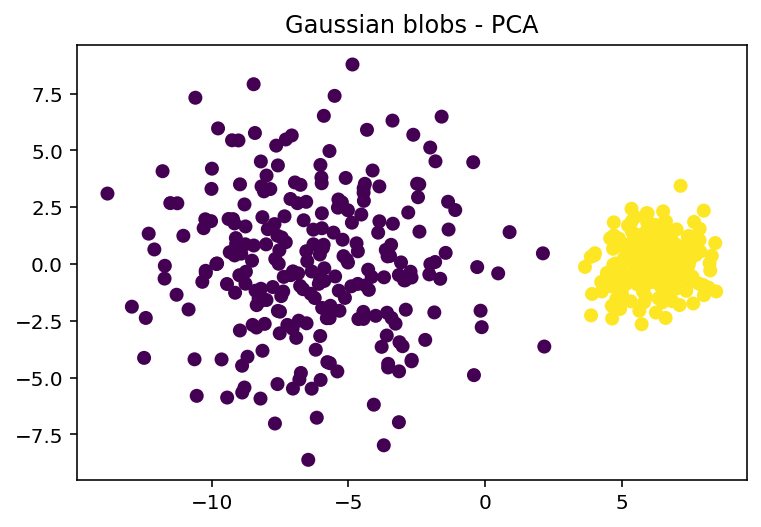

In [ ]:
pca_plots_2d(X, X_color, title)

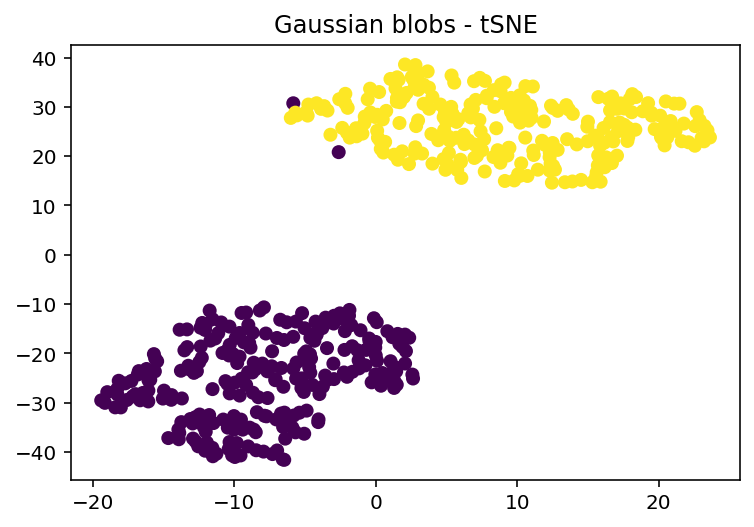

In [ ]:
tsne_plots_2d(X, X_color, title)

In this example, tSNE still performs a good clustering (apart from 2 points). Since it tries to clearly distinguish the two clusters from one another, the two points that are badly clustered are very close to the yellow cluster. We can also note that although the standard deviation is very different, tSNE fails to display that.

PCA shows clusters that are more true to the initial 3D dataset - the standard deviation is better depicted, which also means that the separation between the two clusters is less visible. However, the two blobs are initially distant enough from one another so that it is does not affect the quality of the representation, ie. the clusters do not overlap. 

# Q8: Effects of outliers on the 2D visualization using PCA and TSNE. 

Implement the following function `generate_gaussian_blobs_outliers(n_samples)` by modifying the function `generate_gaussian_blobs` so that there are 30 points randomly sampled in the space $([-50, 50], [-50, 50], [-50, 50])$. We consider those randomly generated points as outliers. 

Run the following cells and compare the effects of the outliers on the PCA and TSNE projections. 

In [ ]:
from random import randint

In [ ]:
def generate_gaussian_blobs_outliers(n_samples):
    # gaussian blob
    X_blob, y_blob = make_blobs(n_samples=n_samples, centers=6, n_features=3, random_state=3)

    # outliers
    n_outliers = 30
    min_bound = -50
    max_bound = 50

    X_outlier = [[randint(min_bound, max_bound) for _ in range(3)] for _ in range(n_outliers)]
    y_outlier = [7 for _ in range(n_outliers)]

    # combining the two
    X = np.vstack([X_blob, X_outlier])
    y = np.hstack([y_blob, y_outlier])

    return X, y, "Gaussian blobs" 

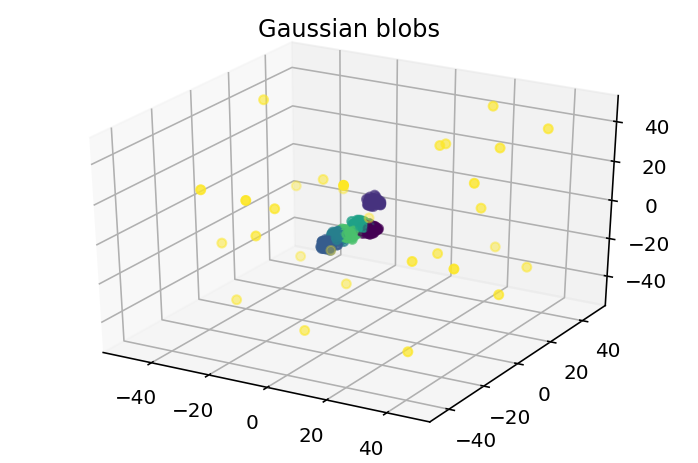

In [ ]:
X, X_color, title = produce_plots_3D(generate_gaussian_blobs_outliers)

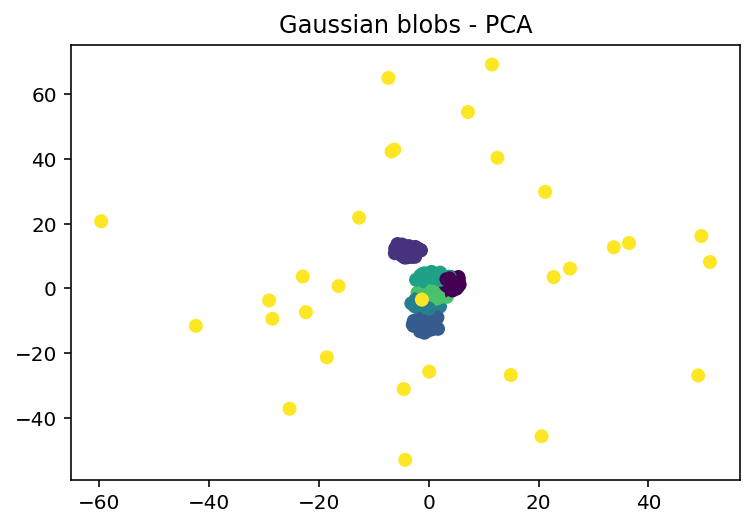

In [ ]:
pca_plots_2d(X, X_color, title)

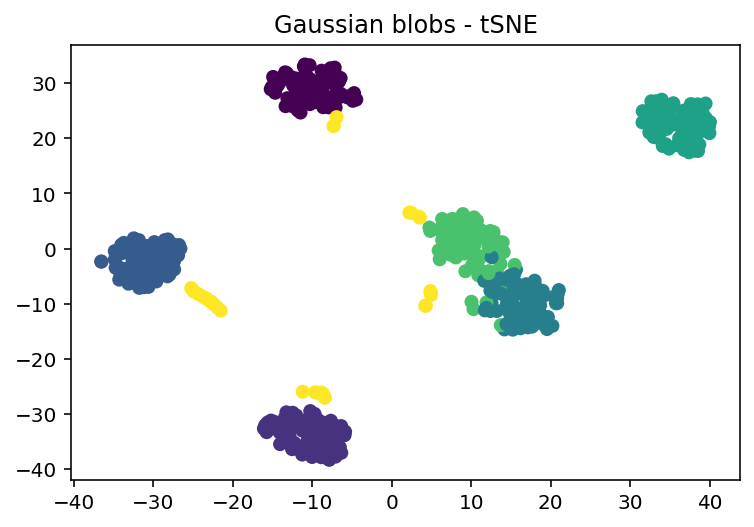

In [ ]:
tsne_plots_2d(X, X_color, title)

The initial blobs are very close to one another compared to the outliers. This makes the PCA representation ineffective, as the clusters occupy a very small portion of the graph in order to see all the outliers. Moreover, we can see that the clusters overlap.

With tSNE, although there is a bit of overlap between two clusters, the clustering is rather successful. In fact, we can see that tSNE has successfully identified the outliers, as they are almost always distinct from the clusters. It is also interesting to note that the algorithm has in a way associated outliers with clusters.

The noise has successfuly been identified by tSNE, and this would be a good example of removing noise using dimensionality reduction. 